In [1]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
table1 = [6, 8, 7, 11, 14, 10, 16] 
table2 = [7, 11, 9, 15, 22, 28, 32]
table3 = [17, 10, 15, 17, 19, 31, 6]

dataset = pd.DataFrame({
    "1 - к-сть прод. кросівок": table1,
    "2 - к-сть прод. кедів": table2,
    "3 - к-сть прод. сандалів": table3
}, index = np.arange(1, len(table1)+1))

dataset.columns.name = "Магазин взуття"
dataset.index.name = "День"

dataset

Магазин взуття,1 - к-сть прод. кросівок,2 - к-сть прод. кедів,3 - к-сть прод. сандалів
День,,,
1,6,7,17
2,8,11,10
3,7,9,15
4,11,15,17
5,14,22,19
6,10,28,31
7,16,32,6


In [8]:
sum1=round((sum(table1)/len(table1)),2)
sum2=round((sum(table2)/len(table2)),2)
sum3=round((sum(table3)/len(table3)),2)

stand1=round((dataset["1 - к-сть прод. кросівок"].std()),2)
stand2=round((dataset["2 - к-сть прод. кедів"].std()),2)
stand3=round((dataset["3 - к-сть прод. сандалів"].std()),2)


new_dataset = pd.DataFrame({
    "1 - к-сть прод. кросівок": table1,
    "2 - к-сть прод. кедів": table2,
    "3 - к-сть прод. сандалів": table3
}, index = np.arange(1, len(table1)+1))

new_dataset.columns.name = "Магазин взуття"
new_dataset.index.name = "День"


new_dataset.loc["Середнє відхилення: "] = [sum1, sum2, sum3]
new_dataset.loc["Стандартне відхилення: "] = [stand1,stand2,stand3]

new_dataset

Магазин взуття,1 - к-сть прод. кросівок,2 - к-сть прод. кедів,3 - к-сть прод. сандалів
День,,,
1,6.00,7.00,17.00
2,8.00,11.00,10.00
3,7.00,9.00,15.00
4,11.00,15.00,17.00
5,14.00,22.00,19.00
6,10.00,28.00,31.00
7,16.00,32.00,6.00
Середнє відхилення:,10.29,17.71,16.43
Стандартне відхилення:,3.68,9.76,7.87


[]

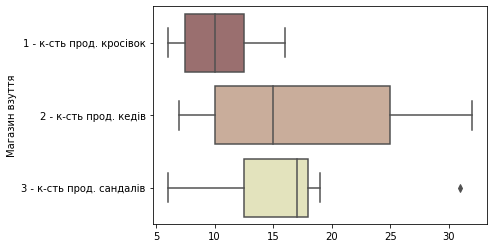

In [13]:
sns.boxplot(data=dataset, orient='h', palette='pink').set()

In [24]:
def dispersia(inf):
    c = (len(inf.iloc[0,:]))
    Tc = 0
    Tc2 = 0
    
    for i in range (c):
        Tc = sum(inf.iloc[:,i])
        Tc2+=(Tc)**2
        
    n = 0
    N = 0
    
    for i in range(c):
        n = len(inf.iloc[:,i])
        N += n
        
    sum2 = 0
    T = 0
    
    for i in range (c):
        T = sum(inf.iloc[:,i])
        sum2 += T
        
    sum2 = (sum2)**2
    sum1 = 0
    
    for i in range (c):
        for j in range(len(inf.iloc[:,i-1])):
            sum1 += (inf.iloc[j][i])**2
                      
    konst = sum2 / N
    SSfact = (Tc2 / n) - konst
    SSzag = sum1 - ((sum2) / N)
    SSvip = SSzag - SSfact
    dfact = c - 1
    dzag = N - 1
    dvip = dzag - dfact
    MSfact = SSfact / dfact
    MSvip = SSvip / dvip
    Femp = MSfact / MSvip
    
    if((26 < (dvip) and (dvip) <= 28)):
        dvip = 26
        
    elif((28 < (dvip) and (dvip) <= 30)):
        dvip = 27
        
    elif((dvip) > 30 and (dvip) <= 40):
        dvip = 28
        
    elif((dvip) > 40 and (dvip) <= 60):
        dvip = 29
        
    elif((dvip) > 60 and (dvip) <= 120):
        dvip = 30
        
    elif((dvip) > 120):
        dvip = 31
        
    else:
        dvip = dvip
        
    if(10 < n and n <= 15):
        dfact = 11
        
    elif(15 < n and n <= 20):
        dfact = 12
        
    elif(20 < n and n <= 30):
        dfact = 13
        
    elif(n > 30):
        dfact = 14

    else:
        dfact = c - 1
        
    Fkrit = pd.read_excel("C:/Users/Zamri Zortog/Desktop/laba8/Фішера.xlsx").iloc[dvip,dfact]  
    
    if(Femp >= Fkrit):
        print("Pівність  не підтверджена")
        
    else:
        print("Pівність  підтверджена")
    
    
    indexes = ["SSфактична", "SSзагальна", "SSвипадкова", "dфактична", "dзагальна", "dвипадкова", "MSфактична", "MSвипадкова", "Fемпірична", "Fкритична"]
    
    new__dataset = pd.DataFrame({
        "Обчислене значення" : [ str(round(SSfact,2)) , str(round(SSzag,2)) ,str(round(SSvip,2)),str(dfact),str(dzag), str(dvip), str(round(MSfact,2)),str(round(MSvip,2)),str(round(Femp,2)), str(Fkrit)]},
        index = indexes
    )
    
    new__dataset.columns.name = "Характеристика"
    
    return new__dataset

In [25]:
dispersia(dataset)

Pівність  підтверджена


Характеристика,Обчислене значення
SSфактична,220.67
SSзагальна,1245.24
SSвипадкова,1024.57
dфактична,2
dзагальна,20
dвипадкова,18
MSфактична,110.33
MSвипадкова,56.92
Fемпірична,1.94
Fкритична,3.5
